# PLL - Exploratory Data Analysis
## Looking at team's perfomances over the course of the entire season including Postseason/Playoffs using the combined dataset constructed previously (see data)

### Import required libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
dfG = pd.read_csv("clean_data/PLL_ALL_Games_clean.csv")
dfG.head()

,away_team,home_team,away_score,home_score,away_win,home_win,date,WEEK
0,REDWOODS,WHIPSNAKES,11,12,False,True,2019-09-21,13
1,ARCHERS,ATLAS,25,7,True,False,2019-09-21,13
2,CHROME,ARCHERS,10,12,False,True,2019-09-14,12
3,REDWOODS,CHAOS,12,7,True,False,2019-09-14,12
4,WHIPSNAKES,CHAOS,15,7,True,False,2019-09-07,11


## Implementing a function to create a dataframe for each team

In [27]:
team_list = ['ARCHERS', 'ATLAS', 'CHAOS', 'CHROME', 'REDWOODS', 'WHIPSNAKES']


dfs = []

def team_gen(team_list):
    
    for i in team_list:
        print(i)
        df_home = dfG[dfG["home_team"] == str(i)]
        df_home = df_home.rename(columns={"home_team":"team",
                                          "away_team":"opponent","WEEK":"week"},)
        df_home["scored"] = df_home.loc[:,"home_score"]
        df_home["conceeded"]=df_home.loc[:,"away_score"]
        cols = ['team','opponent',"scored","conceeded",'away_score', 'home_score', 'away_win', 'home_win',
                       'date', 'week']
        df_home = df_home[cols]
        df_home.drop(columns=["away_score","home_score"])


        df_away = dfG[dfG["away_team"] == str(i)]
        
        df_away = df_away.rename(columns={"home_team":"opponent","away_team":"team","WEEK":"week"},)
        df_away["scored"] = df_away.loc[:,"away_score"]
        df_away["conceeded"]=df_away.loc[:,"home_score"]
        cols = ['team','opponent',"scored","conceeded",'away_score', 'home_score', 'away_win', 'home_win',
                       'date', 'week']
        df_away = df_away[cols]
        df_away.drop(columns=["away_score","home_score"])
        
        df = pd.concat([df_home,df_away ],axis=0)
        df= df.sort_values(by="week", ascending=False).reset_index()
        df.drop(columns="index",inplace=True)

        dfs.append(df)
        
    return dfs

team_gen(team_list)

ARCHERS
ATLAS
CHAOS
CHROME
REDWOODS
WHIPSNAKES


[       team    opponent  scored  conceeded  away_score  home_score  away_win  \
 0   ARCHERS       ATLAS      25          7          25           7      True   
 1   ARCHERS      CHROME      12         10          10          12     False   
 2   ARCHERS    REDWOODS      12         16          16          12      True   
 3   ARCHERS  WHIPSNAKES      11          8           8          11     False   
 4   ARCHERS       CHAOS      10         11          11          10      True   
 5   ARCHERS       ATLAS      15         11          15          11      True   
 6   ARCHERS      CHROME       9          7           9           7      True   
 7   ARCHERS    REDWOODS       8          9           8           9     False   
 8   ARCHERS       ATLAS      12         13          13          12      True   
 9   ARCHERS       CHAOS      13         14          13          14     False   
 10  ARCHERS  WHIPSNAKES      10         11          10          11     False   
 11  ARCHERS    REDWOODS    

In [28]:
Archers = dfs[0]
Atlas = dfs[1]
Chaos= dfs[2]
Chrome= dfs[3]
Redwoods= dfs[4]
Whipsnakes= dfs[5]

Archers.head()

,team,opponent,scored,conceeded,away_score,home_score,away_win,home_win,date,week
0,ARCHERS,ATLAS,25,7,25,7,True,False,2019-09-21,13
1,ARCHERS,CHROME,12,10,10,12,False,True,2019-09-14,12
2,ARCHERS,REDWOODS,12,16,16,12,True,False,2019-09-06,11
3,ARCHERS,WHIPSNAKES,11,8,8,11,False,True,2019-08-25,10
4,ARCHERS,CHAOS,10,11,11,10,True,False,2019-08-17,9


In [29]:
Archers.scored.cumsum()

0      25
1      37
2      49
3      60
4      70
5      85
6      94
7     102
8     114
9     127
10    137
11    147
12    160
Name: scored, dtype: int64

In [30]:
pd.pivot_table(dfG, index="away_team",values="away_score",aggfunc="mean")

,away_score
away_team,
ARCHERS,13.333333
ATLAS,13.000000
CHAOS,13.833333
CHROME,13.250000
REDWOODS,12.625000
WHIPSNAKES,13.400000


In [31]:
pd.pivot_table(dfG, index="home_team",values="home_score",aggfunc="mean")

,home_score
home_team,
ARCHERS,11.428571
ATLAS,12.125000
CHAOS,10.166667
CHROME,9.750000
REDWOODS,10.400000
WHIPSNAKES,12.571429


In [32]:
dfG.away_win.value_counts()

True     22
False    15
Name: away_win, dtype: int64

In [33]:
dfG.home_win.value_counts()

False    22
True     15
Name: home_win, dtype: int64

In [34]:
away_score_week=pd.pivot_table(dfG, index="away_team", values="away_score", aggfunc="sum")

In [35]:
pd.pivot_table(dfG, index="home_team", values="home_score", aggfunc="sum")

,home_score
home_team,
ARCHERS,80
ATLAS,97
CHAOS,61
CHROME,39
REDWOODS,52
WHIPSNAKES,88


In [36]:
dfG.away_score.sum()+dfG.home_score.sum()

906

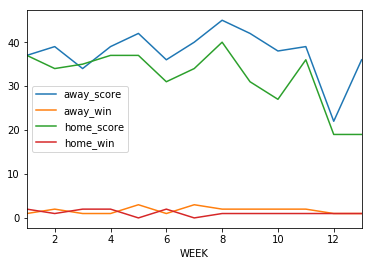

In [37]:
pd.pivot_table(dfG, index="WEEK", aggfunc="sum").plot()

In [38]:
pd.pivot_table(dfG, index=["WEEK","away_team","home_team"], values=["away_score","home_score"])

away_score  home_score
WEEK away_team  home_team                         
1    CHAOS      WHIPSNAKES          14          15
     CHROME     ARCHERS             12          13
     REDWOODS   ATLAS               11           9
2    CHAOS      ATLAS               18          13
     REDWOODS   ARCHERS              9          10
     WHIPSNAKES CHROME              12          11
3    ARCHERS    WHIPSNAKES          10          11
     CHAOS      REDWOODS            12          11
     CHROME     ATLAS               12          13
4    ARCHERS    CHAOS               13          14
     CHROME     REDWOODS            11          13
     WHIPSNAKES ATLAS               15          10
5    ATLAS      ARCHERS             13          12
     CHAOS      CHROME              15          14
     REDWOODS   WHIPSNAKES          14          11
6    ARCHERS    REDWOODS             8           9
     ATLAS      WHIPSNAKES           9          11
     CHROME     CHAOS               19          11
7    ARCHERS    CHROME               9           7
     ATLAS      REDWOODS            18          15
     CHAOS      WHIPSNAKES          13          12
8    ARCHERS    ATLAS               15          11
     CHROME     WHIPSNAKES          20          16
     REDWOODS   CHAOS               10          13
9    CHAOS      ARCHERS             11          10
     CHROME     ATLAS               14          17
     WHIPSNAKES REDWOODS            17           4
10   ATLAS      CHAOS               12           9
     REDWOODS   CHROME              18           7
     WHIPSNAKES ARCHERS              8          11
11   CHROME     ATLAS                8          17
     REDWOODS   ARCHERS             16          12
     WHIPSNAKES CHAOS               15           7
12   CHROME     ARCHERS             10          12
     REDWOODS   CHAOS               12           7
13   ARCHERS    ATLAS               25           7
     REDWOODS   WHIPSNAKES          11          12

In [39]:
team_list = sorted(dfG.away_team.unique())
team_list

['ARCHERS', 'ATLAS', 'CHAOS', 'CHROME', 'REDWOODS', 'WHIPSNAKES']

In [40]:
team_list = sorted(dfG.home_team.unique())
team_list

['ARCHERS', 'ATLAS', 'CHAOS', 'CHROME', 'REDWOODS', 'WHIPSNAKES']

In [41]:
away_score_total=pd.pivot_table(dfG, index="away_team", values="away_score", aggfunc="sum",)
away_score_total

,away_score
away_team,
ARCHERS,80
ATLAS,52
CHAOS,83
CHROME,106
REDWOODS,101
WHIPSNAKES,67


In [42]:
home_score_total=pd.pivot_table(dfG, index="home_team", values="home_score", aggfunc="sum")
home_score_total

,home_score
home_team,
ARCHERS,80
ATLAS,97
CHAOS,61
CHROME,39
REDWOODS,52
WHIPSNAKES,88


In [43]:
away_score_total.unstack()

            away_team 
away_score  ARCHERS        80
            ATLAS          52
            CHAOS          83
            CHROME        106
            REDWOODS      101
            WHIPSNAKES     67
dtype: int64

In [44]:
home_score_total.unstack()

            home_team 
home_score  ARCHERS       80
            ATLAS         97
            CHAOS         61
            CHROME        39
            REDWOODS      52
            WHIPSNAKES    88
dtype: int64

In [45]:
total_score_team = away_score_total.unstack().get_values()+ home_score_total.unstack().get_values()
total_score_team

array([160, 149, 144, 145, 153, 155], dtype=int64)

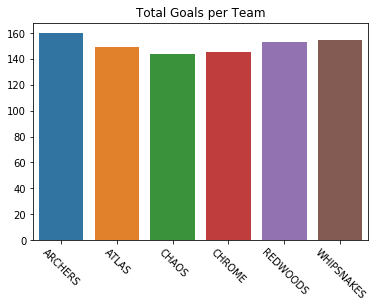

In [55]:
chart = sns.barplot(x=team_list, y=total_score_team)
chart.set_xticklabels(chart.get_xticklabels(),rotation=-45)
plt.title("Total Goals per Team")
plt.savefig("img/Goals-per-team.svg", dpi=300, pad_inches=0, bbox_inches = 'tight')
plt.show()

In [47]:
pd.pivot_table(dfG, index="away_team")

,WEEK,away_score,away_win,home_score,home_win
away_team,,,,,
ARCHERS,6.833333,13.333333,0.500000,9.833333,0.500000
ATLAS,7.000000,13.000000,0.750000,11.750000,0.250000
CHAOS,4.500000,13.833333,0.833333,12.500000,0.166667
CHROME,6.750000,13.250000,0.250000,14.000000,0.750000
REDWOODS,7.750000,12.625000,0.625000,10.125000,0.375000
WHIPSNAKES,7.200000,13.400000,0.800000,8.600000,0.200000


In [48]:
pd.pivot_table(dfG, index=["WEEK","away_team","home_team"], values=["away_score","home_score"]).reset_index()

,WEEK,away_team,home_team,away_score,home_score
0,1,CHAOS,WHIPSNAKES,14,15
1,1,CHROME,ARCHERS,12,13
2,1,REDWOODS,ATLAS,11,9
3,2,CHAOS,ATLAS,18,13
4,2,REDWOODS,ARCHERS,9,10
5,2,WHIPSNAKES,CHROME,12,11
6,3,ARCHERS,WHIPSNAKES,10,11
7,3,CHAOS,REDWOODS,12,11
8,3,CHROME,ATLAS,12,13
9,4,ARCHERS,CHAOS,13,14


In [50]:
dfG[dfG.away_team == "REDWOODS"]

,away_team,home_team,away_score,home_score,away_win,home_win,date,WEEK
0,REDWOODS,WHIPSNAKES,11,12,False,True,2019-09-21,13
3,REDWOODS,CHAOS,12,7,True,False,2019-09-14,12
6,REDWOODS,ARCHERS,16,12,True,False,2019-09-06,11
8,REDWOODS,CHROME,18,7,True,False,2019-08-25,10
15,REDWOODS,CHAOS,10,13,False,True,2019-08-10,8
22,REDWOODS,WHIPSNAKES,14,11,True,False,2019-06-29,5
32,REDWOODS,ARCHERS,9,10,False,True,2019-06-08,2
34,REDWOODS,ATLAS,11,9,True,False,2019-06-02,1


In [51]:
dfG.iloc[30]

away_team          CHAOS
home_team       REDWOODS
away_score            12
home_score            11
away_win            True
home_win           False
date          2019-06-15
WEEK                   3
Name: 30, dtype: object

In [52]:
dfG[dfG["home_team"]=="CHAOS"].count()

away_team     6
home_team     6
away_score    6
home_score    6
away_win      6
home_win      6
date          6
WEEK          6
dtype: int64